# Network Science H21: Assignment 1 (by Jan Bauer 18-764-571)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## A01.1 Building and visualising networks

### 1. Star Network

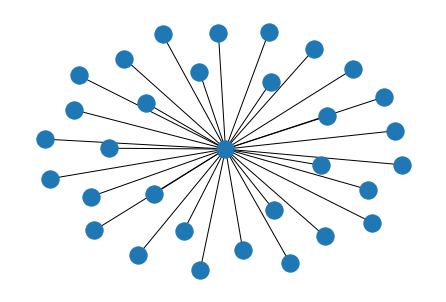

In [2]:
number_of_nodes = 32 # Target number of nodes in the graph

g = nx.Graph() # Create a new empty graph

for i in range(number_of_nodes): # Iterate over [0, 31]
    g.add_node(i) # Add individual nodes to the network
    
for i in range(1, number_of_nodes): #Iterate over [0, 31]
    g.add_edge(0, i) # Add an edge between the center node (0) and every other node
    
nx.draw(g) # Visualize the graph

### 2. Fully Connected Network

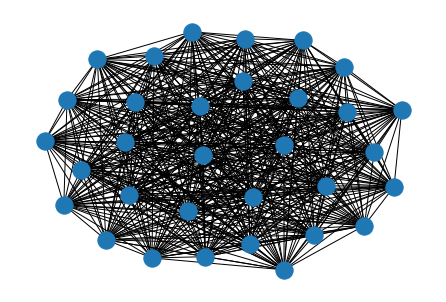

In [3]:
g = nx.Graph() # Create a empty graph instance

for i in range(number_of_nodes): # Iterate over [0, 31]
    g.add_node(i) # Add all nodes

# 0 is the center node
# Add an edge from every node to the center node
for i in range(number_of_nodes): # Iterate over all edge start nodes
    for j in range(number_of_nodes): # Iterate over all edge end nodes
        if i == j: # Skip all loops
            continue
        else:
            g.add_edge(i, j) # Adding edges between nodes i,j with i != j

nx.draw(g) # Visualize graph

### 3 One-dimensional lattice
with periodic boundary conditions, where each node 𝑖 has degree 𝑘_𝑖 = 2

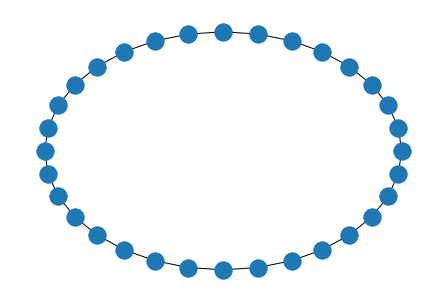

In [4]:
d = 1 # 1-D lattice with degree of 2, meaning it's connected to its nearest neighboring nodes
v = 32 # size of the network
one_d_Lattice = nx.Graph() # initiate an instance of graph with no node
for i in range(v): # iterate over [0, 30]
    one_d_Lattice.add_node(i) # add each node to the network
for j in range(v):
    one_d_Lattice.add_edge(j,(j+1)%v) # connect the newly added node to its right neighbor
    one_d_Lattice.add_edge(j,(j-1)%v) # connect the newly added node to its left neighbor
nx.draw(one_d_Lattice, pos = nx.circular_layout(one_d_Lattice)) # draw the star network

## A01.2 Global properties

### A01.2a Global properties
#### Compute the average degree $⟨𝑘⟩$ and the density $\delta$ of the networks

In [5]:
def compute_average_degree(graph):
    graph_degrees = graph.degree()
    graph_degrees = [graph_degrees[i] for i in graph.nodes()]
    n_edges = sum(graph_degrees)
    n_nodes = len(graph.nodes())
    average_degree = n_edges / n_nodes
    return average_degree

In [15]:
def compute_density(graph):
    graph_degrees = graph.degree()
    graph_degrees = [graph_degrees[i] for i in graph.nodes()]
    n_edges = sum(graph_degrees)
    n_nodes = len(graph.nodes())
    if(nx.is_directed(graph)):
        density = (n_edges)/(n_nodes * (n_nodes-1))
    else: 
        density = (2*n_edges)/(n_nodes * (n_nodes-1))
    return density

In [7]:
def max_degree(graph):
    graph_degrees = graph.degree()
    max_degree = 0
    max_degree_node = None
    for i in graph.nodes():
        current_degree = graph_degrees[i]
        if current_degree > max_degree:
            max_degree_node = i
            max_degree = current_degree
    return max_degree_node, max_degree

In [16]:
# For Zachary Karate Club
zachary_graph = nx.read_gml("data/graph_karate.gml")
zachary_average_degree = compute_average_degree(zachary_graph)
print("Zachary Karate Club")
print("Average Degree: {}".format(zachary_average_degree))
zachary_density = compute_density(zachary_graph)
print("Density: {}".format(zachary_density))
zachary_max_degree = max_degree(zachary_graph)
print("Max Degree: {}".format(zachary_max_degree))

Zachary Karate Club
Average Degree: 4.588235294117647
Density: 0.27807486631016043
Max Degree: (33, 17)


In [17]:
# For NetSci Collaborations Graph
netsci_graph = nx.read_gml("data/graph_netsci.gml")
print("NetSci Collaborations Graph")
netsci_average_degree = compute_average_degree(netsci_graph)
print("Average Degree: {}".format(netsci_average_degree))
netsci_density = compute_density(netsci_graph)
print("Density: {}".format(netsci_density))
netsci_max_degree = max_degree(netsci_graph)
print("Max Degree: {}".format(netsci_max_degree))

NetSci Collaborations Graph
Average Degree: 3.753593429158111
Density: 0.005141908807065905
Max Degree: ('33', 34)


In [18]:
# For Facebook Friendships Graph
facebook_graph = nx.read_gml("data/graph_facebook.gml")
print("Facebook Friendhips Graph")
facebook_average_degree = compute_average_degree(facebook_graph)
print("Average Degree: {}".format(facebook_average_degree))
facebook_density = compute_density(facebook_graph)
print("Density: {}".format(facebook_density))
facebook_max_degree = max_degree(facebook_graph)
print("Max Degree: {}".format(facebook_max_degree))

Facebook Friendhips Graph
Average Degree: 43.69101262688784
Density: 0.021639927006878574
Max Degree: ('107', 1045)


## Exercise 1.3

In [85]:
def plot_degree_distribution(deg, xscale='linear', yscale='linear', bins=20, density=True):
    fig, ax = plt.subplots()
    title = "Degree Distribution "

    if xscale == 'log':
        title+="Log"
        binlog = np.logspace(np.log10(min(deg)),np.log10(max(deg)), bins)
        plt.hist(deg, binlog, density = density, alpha=0.5)
        plt.xlabel('log k')
    else:
        title+="Lin"
        plt.hist(deg, bins = bins, density = density, alpha=0.5)
        plt.xlabel('k')
        
    if yscale == 'log':
        plt.ylabel("log P(k)")
        title+="-Log Scale"
    else:
        plt.ylabel("P(k)")
        title+="-Lin Scale"
    
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.title(title)
    plt.show() 

In [86]:
# Zachary Karate Club
zachary_graph_degrees = zachary_graph.degree()
zachary_graph_degrees = [zachary_graph_degrees[i] for i in zachary_graph.nodes()]

In [87]:
np.unique(zachary_graph_degrees) # Inspecting range of degrees

array([ 1,  2,  3,  4,  5,  6,  9, 10, 12, 16, 17])

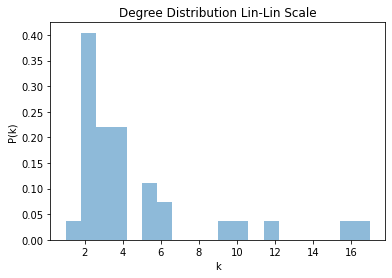

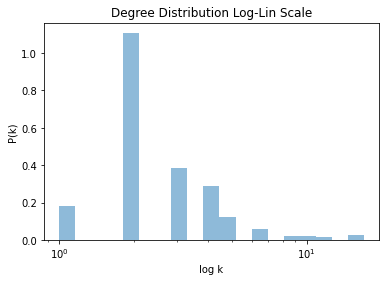

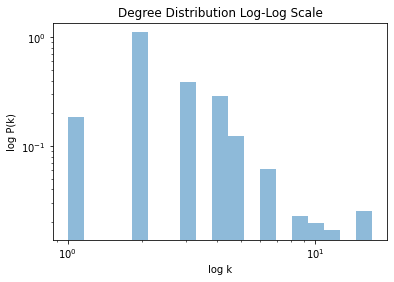

In [88]:
plot_degree_distribution(zachary_graph_degrees)
plot_degree_distribution(zachary_graph_degrees, xscale='log')
plot_degree_distribution(zachary_graph_degrees, xscale='log', yscale='log')

=> For this example the lin-lin scale is still good since the degress are on a range from 1 to 17 (relatively small range) with still well visible distribution

In [89]:
# NetSci Collaborations Graph
netsci_graph_degrees = netsci_graph.degree()
netsci_graph_degrees = [netsci_graph_degrees[i] for i in netsci_graph.nodes()]

In [90]:
np.unique(netsci_graph_degrees) # Inspecting range of degrees

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18,
       19, 20, 21, 27, 34])

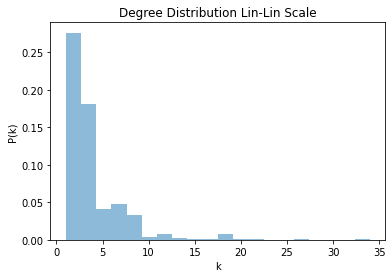

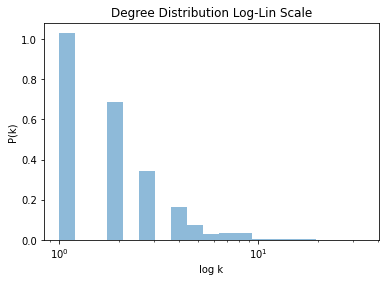

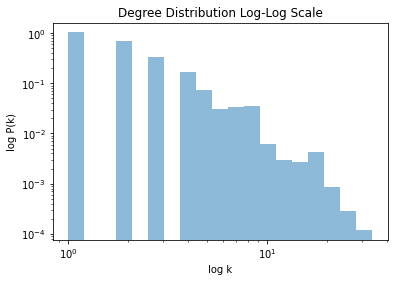

In [91]:
plot_degree_distribution(netsci_graph_degrees)
plot_degree_distribution(netsci_graph_degrees, xscale='log')
plot_degree_distribution(netsci_graph_degrees, xscale='log', yscale='log')

=> Here the log-log representation enables to see the less frequent high degress in the tail

In [92]:
# Facebook Friendship Graph
facebook_graph_degrees = facebook_graph.degree()
facebook_graph_degrees = [facebook_graph_degrees[i] for i in netsci_graph.nodes()]

In [93]:
np.unique(facebook_graph_degrees) # Inspecting range of degrees

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   87,   88,   89,
         90,   91,   92,   93,   94,   95,   96,   97,   98,   99,  100,
        102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
        113,  114,  115,  117,  120,  122,  123,  124,  125,  126,  128,
        130,  131,  132,  133,  135,  136,  137,  139,  141,  142,  146,
        147,  148,  149,  151,  152,  154,  156,  158,  159,  160,  166,
        167,  169,  170,  171,  173,  175,  178,  1

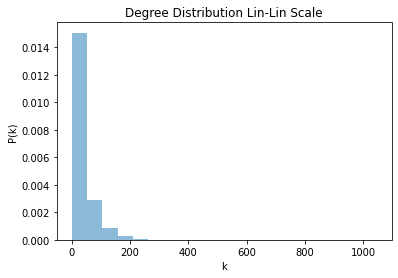

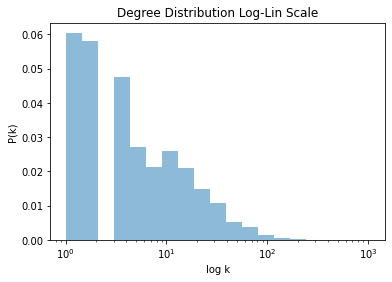

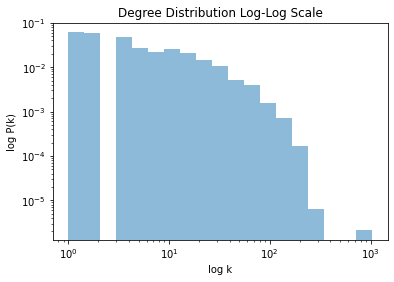

In [94]:
plot_degree_distribution(facebook_graph_degrees)
plot_degree_distribution(facebook_graph_degrees, xscale='log')
plot_degree_distribution(facebook_graph_degrees, xscale='log', yscale='log')

=> In this example Log-Lin and Log-Log Scale work well